In [ ]:
import pandas as pd

#reading the comma separated file
df = pd.read_csv('ex1data2.txt', header=None)
print(df)

       0  1       2
0   2104  3  399900
1   1600  3  329900
2   2400  3  369000
3   1416  2  232000
4   3000  4  539900
5   1985  4  299900
6   1534  3  314900
7   1427  3  198999
8   1380  3  212000
9   1494  3  242500
10  1940  4  239999
11  2000  3  347000
12  1890  3  329999
13  4478  5  699900
14  1268  3  259900
15  2300  4  449900
16  1320  2  299900
17  1236  3  199900
18  2609  4  499998
19  3031  4  599000
20  1767  3  252900
21  1888  2  255000
22  1604  3  242900
23  1962  4  259900
24  3890  3  573900
25  1100  3  249900
26  1458  3  464500
27  2526  3  469000
28  2200  3  475000
29  2637  3  299900
30  1839  2  349900
31  1000  1  169900
32  2040  4  314900
33  3137  3  579900
34  1811  4  285900
35  1437  3  249900
36  1239  3  229900
37  2132  4  345000
38  4215  4  549000
39  2162  4  287000
40  1664  2  368500
41  2238  3  329900
42  2567  4  314000
43  1200  3  299000
44   852  2  179900
45  1852  4  299900
46  1203  3  239500


In [ ]:
import numpy as np
#separating dataset into X (independent variables) and Y (dependent variable)
X= df.iloc[:, 0:2].values
Y= df.iloc[:, 2].values
#X=np.reshape(X, (X.shape[0], X.shape[1], 1))
Y=np.reshape(Y, (Y.shape[0],1))
print(X.shape)
print(Y.shape)

(47, 2)
(47, 1)


In [ ]:
#performing Z-score normalization
mean=np.mean(X, axis=0)
std= np.std(X, axis=0)
X=(X-mean)/std

In [ ]:
#defining a plotting function for plotting costs w.r.t iteration number
def plotCost(captionText, costsAtAllItrs):
  import matplotlib.pyplot as plt
  import matplotlib.ticker as plticker

  minx= np.min(costsAtAllItrs[:,0])
  miny=np.min(costsAtAllItrs[:,1])
  maxx=np.max(costsAtAllItrs[:,0])
  maxy=np.max(costsAtAllItrs[:,1])
  
  plt.xlabel('Iteration No.')
  plt.ylabel('Cost')
  plt.plot(costsAtAllItrs[:,0], costsAtAllItrs[:,1])
  plt.figtext(0.5, -0.03, captionText, wrap=True, horizontalalignment='center', fontsize=12)
  plt.axis([0, maxx, 0, maxy])  #defining starting value and ending value on each axis
  plt.margins(x=0, y=0)

  plt.xticks(np.arange(minx, maxx, 5))
  plt.show()
  print("\n")

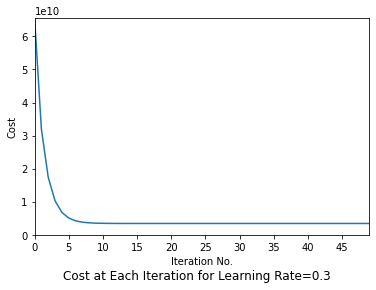

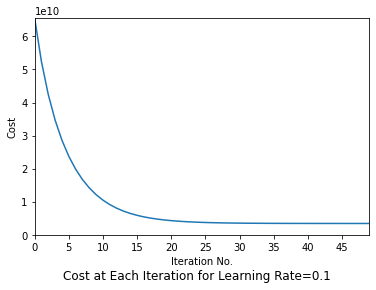

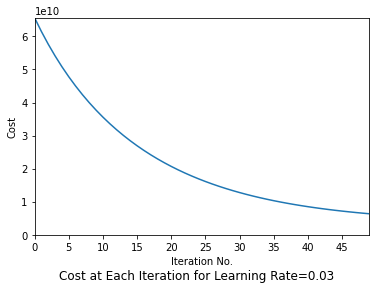

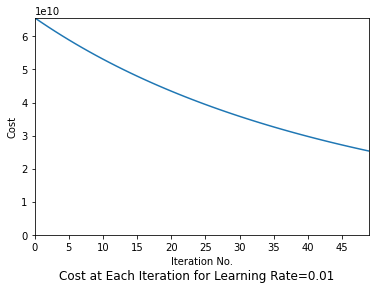

In [ ]:
from Model import LinearRegression

model=LinearRegression()

#training at learningRate= 0.3 
model.fit(X,Y, learningRate=0.3, printCost=False, storeCosts=True, numOfIterations=50)
costsAtAllItrs=model.getCostsAtAllIterations()
plotCost("Cost at Each Iteration for Learning Rate=0.3", costsAtAllItrs)

#training at learningRate= 0.1
model.fit(X,Y, learningRate=0.1, printCost=False, storeCosts=True, numOfIterations=50)
costsAtAllItrs=model.getCostsAtAllIterations()
plotCost("Cost at Each Iteration for Learning Rate=0.1", costsAtAllItrs)

#training at learningRate= 0.03
model.fit(X,Y, learningRate=0.03, printCost=False, storeCosts=True, numOfIterations=50)
costsAtAllItrs=model.getCostsAtAllIterations()
plotCost("Cost at Each Iteration for Learning Rate=0.03", costsAtAllItrs)

#training at LearningRate=0.01
model.fit(X,Y, learningRate=0.01, printCost=False, storeCosts=True, numOfIterations=50)
costsAtAllItrs=model.getCostsAtAllIterations()
plotCost("Cost at Each Iteration for Learning Rate=0.01", costsAtAllItrs)

In [ ]:
#since the graph of cost looked good for learningRate=0.1, so training at this learning rate
model.fit(X,Y, learningRate=0.1, printCost=False, storeCosts=False, numOfIterations=50)

#predicting the price of house with 1650 sq feet and 3 bedrooms.
testX=[1650, 3]
testX=np.reshape(testX, (1, np.shape(testX)[0]))
testX=(testX-mean)/std
predictedY=model.predict(testX)
predictedY=np.squeeze(predictedY)
print("Predicted Price of the house with 1650 sq feet and 3 bedrooms: "+str(predictedY))


Predicted Price of the house with 1650 sq feet and 3 bedrooms: 304087.05884952267


In [ ]:
from Model import NormalEquationLinearRegression
#training the linear regression model based on normal equation.
model2= NormalEquationLinearRegression();
model2.fit(X, Y)

In [ ]:
predictedY=model2.predict(testX)
predictedY=np.squeeze(predictedY)
print("Predicted Price of the house with 1650 sq feet and 3 bedrooms (using normal equation based linear regression): "+str(predictedY))

Predicted Price of the house with 1650 sq feet and 3 bedrooms (using normal equation based linear regression): 293081.4643348961
